# Traitement d'images et deep learning: session 1

In [5]:
%matplotlib inline

## Programme des sessions pratiques

### Image : de la physique à l'informatique

Une image numérique désigne une image qui a été _acquise, créée, traitée_ et _stockée_ sous une forme binaire (0 et 1). 

Dans la plupart des cas, les images que nous manipulons quotidiennement sont en 2D et en couleur. Celles-ci sont constituées de pixels. Chacun de ces pixels est caractérisé par une couleur qui lui est propre. 

**Au fait, qu'est-ce qu'une couleur ?**

La couleur est la perception visuelle de l'aspect d'une lumière, c'est-à-dire d'une onde électromagnétique monochromatique, caractérisée par une seule longueur d'onde (nm) ou fréquence (Hz).

<img src="https://upload.wikimedia.org/wikipedia/commons/3/30/EM_spectrumrevised_fr.png" width="400">

Si un citron nous apparaît jaune, c'est car la matière qui le constitue (les molécules qui le composent) réfléchissent majoritairement les ondes ayant une longueur d'onde appartenant à la zone du spectre visible qui _nous paraît jaune_. Autre exemple, un objet noir _nous paraît noir_ car celui-ci absorbe une bonne partie, si ce n'est l'intégralité des ondes du spectre visible. 

C'est d'ailleurs pour cela que nous ne percevons pas les couleurs dans le noir, car, en l'absence de lumière visible, les objets ne réfléchissent pas d'énergie, et donc pas d'ondes que nous pourrions percevoir à l'oeil nu. C'est d'ailleurs pour cela que nous nous sommes intéressés à la perception des ondes infra-rouges la nuit. Le corps humain, par exemple, réfléchit certaines ondes dont la longueur d'onde appartient au domaine infrarouge : nous ne les percevont pas car les cellules nerveuses spécialisées au niveau de notre rétine ne sont pas sensibles à ce type de rayonnement.


**Petit rappel de nos lointoins cours de SVT.**

Notre rétine contient deux types de cellules appelées photorécepteurs : les bâtonnets et les cônes. La lumière entrante stimule ces cellules nerveuses, puis le système nerveux transmet et traite l'influx jusqu'au cortex visuel. La rétine contient 20 fois plus de bâtonnets que de cônes.

Les bâtonnets de l'oeil humain sont sensibles dans une gamme allant de 415 à 555 nm (gamme de violet à vert) avec un maximum à 498 nm qui est un vert légèrement bleuté, permettent la vision en faible luminosité. 

L'oeil humain comporte trois types de cônes situés principalement sur la fovéa (dépression de la macula d'un millimètre de diamètre - tache jaune) près du centre de la rétine.  Ces trois types de récepteurs ont un maximum d'absorption correspondant à trois longueurs d'onde différentes correspondant à des lumières de couleur rouge-orangé, verte et bleue.

- Les cônes L (long), sensibles aux lumières de longueur d'onde dans le vide de 470 à 630 nm (de bleu-vert à rouge)f, avec un maximum à 555 nm qui est un vert-jaune.
   
- Les cônes M (medium), sensibles aux ondes de longueur moyenne, de 440 à 595 nm (gamme de bleu à orange), avec un maximum à 525 nm donc dans le vert.

- Les cônes S (short), sensibles aux ondes courtes, d'environ 290 à 470 nm (gamme de violet à bleu-vert), avec un maximum à 420 nm, un violet-bleu.

Les photorécepteurs humains sont au total sensibles à une bande de longueurs d'onde dans un intervalle approximatif de 400-700 nm. 

**La combinaison de ces trois sensibilités détermine la sensation de couleurs de l'être humain. Avec trois types de récepteurs, tous les systèmes de description des couleurs la décrivent avec trois valeurs, sur trois axes.**

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Cone-response-en.svg" width="400">


**Comment représenter informatiquement une couleur ?**

Nous l'avons dit, un pixel est communément associé à une couleur. Il existe plusieurs modes de codage informatique des couleurs, le plus utilisé étant l'espace colorimétrique rouge, vert, bleu (RVB ou RGB en anglais). Cet espace est basé sur une synthèse additive des couleurs, c'est-à-dire que le mélange des trois composantes R, V, et B à leur valeur maximum donne du blanc, à l'instar de la lumière. Le mélange de ces trois couleurs à des proportions diverses permet de reproduire à l'écran une part importante du spectre visible. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CIExy1931_fixed.svg" width="400">

Le schéma ci-dessus est un diagramme xy. Ce type de diagramme, datant de 1931, permet de relier la longueur d'onde aux composantes X, Y, Z, elles-mêmes permettant d'aboutir aux composantes R, G, B. Pour les lecteurs intéressés, voici une explication de cette conversion datant de 1996 : https://www.fourmilab.ch/documents/specrend/.

**Comment représenter une infinité de couleurs avec un codage fini ?** C'est simple : on ne peut pas. Nous sommes obligés de nous cantonner à un nombre limité de couleurs représentatives du spectre visible. On estime grossièrement que l'oeil humain est capable de distinguer, en moyenne, environ 15 à 20 000 nuances différences ([1]). De fait, il n'est pas si grave que de ne pouvoir représenter qu'un nombre fini de couleurs du spectre visible.

**Codage et octets**

Le codage classique de la couleur dans l'espace RVB est réalisé sur trois octets. Un octet est un multiplet de 8 bits (1/0) codant une information. Dans ce système de codage, un octet permet de représenter $2^8$ nombres, soit 256 valeurs différentes.

<img src="http://www.dicofr.com/def2/image/octet.gif" width="400">

Ainsi, chaque pixel est caractérisé par 3 composantesdont les valeurs peuvent aller de 0 à 255.

<img src="https://www.editions-petiteelisabeth.fr/images/infos/couleurs_r_v_b.png?1466422826" width="400">


**Ainsi, une image codée en RVB classique permet de construire $256\times 256\times 256 \equiv 16$ millions de couleurs ! C'est ce qu'on appelle les images 24 bits (8 pour Rouge, 8 pour Vert et 8 pour Bleu, soit $2^24$ possibilités).** http://formation.dunoyer.free.fr/imagesnum/bits.htm


[1] Robert Sève, Science de la couleur : Aspects physiques et perceptifs, Marseille, Chalagam, 2009, p. 229.

## Représentation des images

#### Récupération d'une image emblématique : `lena` ([2]).
[2] : François Lecellier et Christine Fernandez-Maloigne, «Lena, une référence en traitement d’images», Images du travail Travail des images [En ligne], Images du travail, Travail des images, n° 3. Le travail des images dans la démarche de recherche. Analyse réflexive et compréhension de l'objet, Un oeil, une image, mis à jour le : 14/02/2017, URL : https://imagesdutravail.edel.univ-poitiers.fr:443/imagesdutravail/index.php?id=1285. 

Ici, on utilise la librairie `PIL` : Python Imaging Library. Plus d'informations ici : https://he-arc.github.io/livre-python/pillow/index.html.

In [6]:
import requests # aller chercher l'image sur le web
import shutil # l'enregistrer localement
from PIL import Image # lecture et traitement 

# url de l'image.
image_url = "/".join([
    "https://imagesdutravail.edel.univ-poitiers.fr",
    "docannexe/image/1285",
    "ximg-1.png.pagespeed.ic.u3cmVM4TPP.jpg"
])
# on récupère l'image via une requête web.
r = requests.get(image_url, stream = True)
# on enregistre localement l'image.
filename = 'lena'
with open('lena.png', 'wb') as f:
    shutil.copyfileobj(r.raw, f) 
    print('Image sucessfully downloaded !')
# et on la stocke dans la mémoire vive.
lena = Image.open(open('lena.png', 'rb'))
# on en modifie la taille: 512x512
lena = lena.resize((512, 512), Image.ANTIALIAS)

Image sucessfully downloaded !


#### Affichage de l'image.

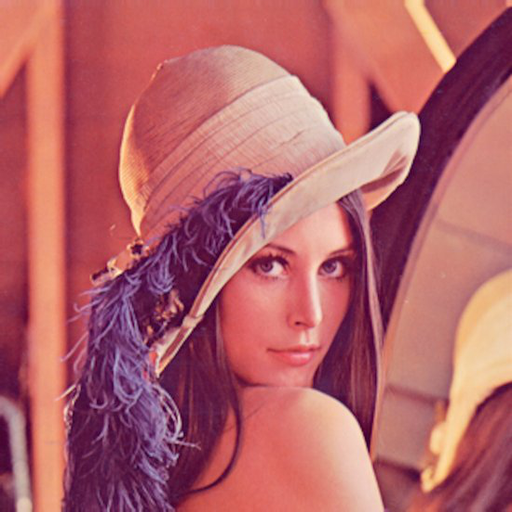

In [7]:
lena

### Conversion en une matrice

On utilise pour cela la librarie `numpy`. C'est une bibliothèque Python destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux. 

In [8]:
import numpy as np

In [9]:
matrice = np.array(lena)
print(f'Dimensions de la matrice : {matrice.shape}')

Dimensions de la matrice : (512, 512, 3)


On peut s'intéresser au format de l'image.

In [10]:
pixel00 = matrice[0, 0, :]
pixel00

array([225, 137, 127], dtype=uint8)

On voit bien que le codage de la couleur se fait selon 3 modalités dont l'intensité varie de 0 à 255 (256 valeurs).
Ici, le type du vecteur (et de la matrice) est `dtype=uint8`.
Ceci correspond à des **entiers non-signés stockés sur 8 bits**.
Par exemple, notre pixel `pixel00` possède la représentation en bits suivante : 
[11100001 10001001 01111111].

Pourquoi parle-t-on d'entiers non-signés ? Car ces entiers sont toujours positifs et ramenés entre 0 et 255 à l'aide d'un modulo 256.

Concentrons nous sur le carré de côté 100 pixels en haut à gauche de l'image et affichons-le.

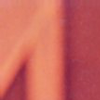

In [11]:
pixel1010 = matrice[0:100, 0:100, :]
Image.fromarray(pixel1010)

### uint8, uint16

Que se passe-t-il si l'on ajoute 255 sur toutes les valeurs d'un pixel ?

In [12]:
pixel00 + 255 # le codage est toujours en uint8 car 255 est en entier représenté en 8 bits !

array([224, 136, 126], dtype=uint8)

Que se passe-t-il si l'on ajoute 255+1=256 sur toutes les valeurs d'un pixel ?

In [13]:
pixel00 + 256 # le codage est désormais en uint16 car
# l'on a besoin de 16 bits pour représenter 256.
# Automatiquement, numpy va donc s'adapter au format qui
# nécessite le plus de bits pour être encodé.
# Ici, le type n'est pas préservé et l'on bascule en uint16.

array([481, 393, 383], dtype=uint16)

Si on spécifie très exactement à Numpy de convertir l'uint16 en uint18, on retombe sur les mêmes valeurs initiales.

In [14]:
(pixel00 + 256).astype(np.uint8) # numpy dispose d'un type uint8

array([225, 137, 127], dtype=uint8)

Pour reprendre notre carré, voyons ce que ajouter 256 modifie à l'affichage.

In [15]:
try:
    Image.fromarray(pixel1010+256)
except TypeError as e:
    print('Previous instruction failed, an error occured.')
    print(f'Error : {e}')

Previous instruction failed, an error occured.
Error : Cannot handle this data type: (1, 1, 3), <u2


A l'inverse de nombreuses librairies en Python (_e.g._ matplotlib, opencv, scikit-image), les matrices lues par `PIL` pour être affichées en tant qu'image doivent être `uint8` ([0, 255]).

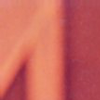

In [16]:
Image.fromarray((pixel1010+256).astype(np.uint8)) # tout fonctionne correctement désormais !

### float

De la même manière, on peut aussi représenter l'image sous le format flottant, c'est-à-dire une valeur _réelle_ entre 0 et 1.
Là-aussi, le format flottant peut encoder de manière plus ou moins riche l'information (à des coûts variables) avec des bits.
On traite généralement de `float16`, `float32` et `float64`. Ceci se réfère à la norme IEEE 754 sur l'arithmétique à virgule flottante mise au point par le Institute of Electrical and Electronics Engineers. Elle est la norme la plus employée actuellement pour le calcul des nombres à virgule flottante avec les CPU et les GPU. La norme définit les formats de représentation des nombres à virgule flottante (signe, mantisse, exposant, nombres dénormalisés) et valeurs spéciales (infinis et NaN), en même temps qu’un ensemble d’opérations sur les nombres flottants.

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/IEEE754_simple_precision.png" width="400">

Par exemple, en `float32`, la valeur d'un nombre est codée de la manière suivante :

$$v = s \times 2^e \times m$$

avec :
  - $s = ±1$ représente le signe (selon le bit de signe) ;
  - $e$ est l'exposant (auquel on retire le biais de 127);
  - $m = 1+mantisse$ représente la partie significative (en binaire), d'où 1 ≤ m < 2 (mantisse étant la partie décimale de la partie significative, comprise entre 0 et 1)
    
C'est-à-dire 1 bit de signe, 8 bits pour l'exposant et 23 pour la mantisse. 

**Exemple:**

**0b 0 01111100 01000000000000000000000** : 
- le signe est positif ($0$),
- l'exposant est $124 − 127 = −3$,
- la partie significative est $1+0,01=1,01$ soit $1,25$ en décimal car $(1 \times 2^0 \times 0× 2^{−1} + 1 \times 2^{−2}) = (1 + 0 + 0,25) = 1,25$

Le nombre représenté est donc $+ 1,25 \times 2^{−3} = + 0,15625$. 

Ainsi, avec ce système de codage, le nombre le plus proche de $0$ est $± 2^{−149} ≈ ± 1,4012985 \times 10^{−45} $.
Et le nombre le plus loin de $0$ est $± (2−2^{−23}) \times 2^{127} ≈ ± 3,4028235 \times 10^{38}$.


Si l'on convertit notre pixel au format float32, un `.` apparaît pour signifier le format _flottant_.

In [17]:
pixel00.astype(np.float32)

array([225., 137., 127.], dtype=float32)

Si l'on divise notre pixel par 255, les valeurs seront donc comprises entre 0 et 1; la conversion se fera automatiquement en `float64` sous Numpy.

In [18]:
print(pixel00 / 255, (pixel00 / 255).dtype)

[0.88235294 0.5372549  0.49803922] float64


Malheureusement, `PIL` ne sait pas faire la conversion de `float64` (ou 16 ou 32) vers `uint8`.

In [19]:
try:
    Image.fromarray(pixel1010 / 255)
except TypeError as e:
    print('Previous instruction failed, an error occured.')
    print(f'Error : {e}')

Previous instruction failed, an error occured.
Error : Cannot handle this data type: (1, 1, 3), <f8


Il faut soit lui convertir la matrice de flottant en entiers (matrice * 255); soit convertir directement l'image (et non la matrice) lorsqu'on la charge en mémoire.

**En revanche, la librairie `pyplot` de `matplotlib` (très couramment utilisée), fait directement la conversion.**

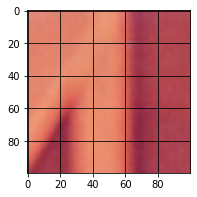

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(pixel1010 / 255)
ax.grid('on', color='black')
fig.show()

L'avantage de `PIL` est la simplicité des fonctions de retouche des images implémentées. Le format utilisé impose certaines contraintes que l'on ne retrouve pas dans `matplotlib`, ce dernier implémentant également des fonctions de traitement de l'image, mais moins intuitives que celles de `PIL`.

### Manipulation sur l'image

On va s'intéresser à un carré autour du centre de l'image, de longueur 100 x 100.

In [21]:
matrice_centre = matrice[
        (256-100):(256+100), # coordonnées sur l'axe de la largeur
        (256-100):(256+100), # coordonnées sur l'axe de la longueur
        0:3 # les 3 canaux R, V et B
]

On affiche le _crop_ central en utilisant les librairies `matplotlib.pyplot` et `PIL`.

In [27]:
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

#### Couleurs et obscurcissement

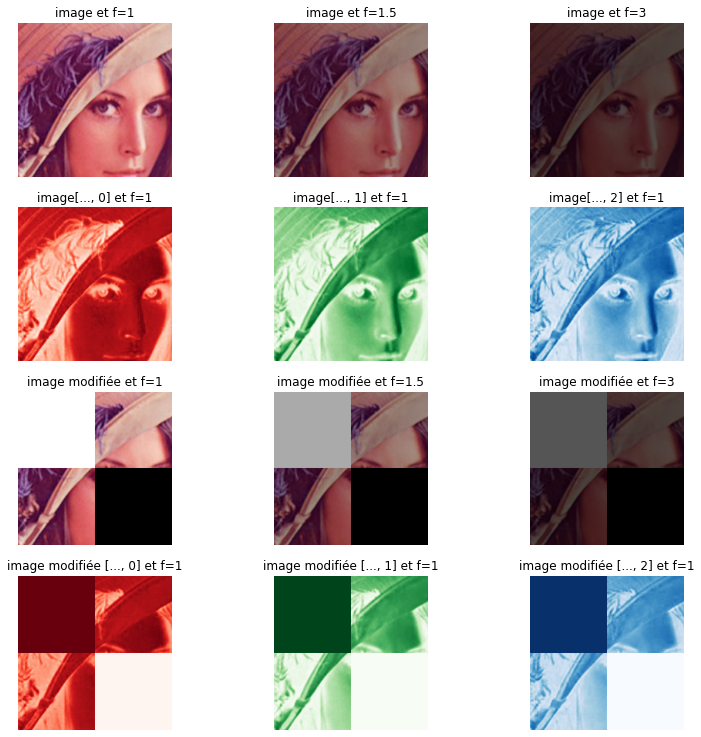

In [23]:
# on déclare une figure avec des axes (un axe = une image).
fig, axes = plt.subplots(4, 3, figsize=(13, 13))
# on déclare un ensemble de palette de couleurs pour R, V et B.
cmaps = [matplotlib.cm.Reds, matplotlib.cm.Greens, matplotlib.cm.Blues]
# matrice_mod est une matrice sur laquelle l'on transforme 2 quarts de 
# l'image en zones noires et blanches.
matrice_mod = matrice_centre.copy()
matrice_mod[:100, :100, :] = 255 # blanc
matrice_mod[100:, 100:, :] = 0 # noir
for i, f in enumerate([1, 1.5, 3]):
    # obscurcissement de l'image avec un facteur `f`.
    axes[0, i].imshow((matrice_centre / f).astype(np.uint8))
    axes[0, i].axis('off')
    axes[0, i].set_title(f'image et f={f}')
    # affichage du canal R, V, ou B sur l'image normale.
    axes[1, i].imshow(matrice_centre[..., i], cmap=cmaps[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'image[..., {i}] et f=1')
    #  obscurcissement de l'image modifiée avec un facteur `f`.
    axes[2, i].imshow((matrice_mod / f).astype(np.uint8), cmap=cmaps[i])
    axes[2, i].axis('off')
    axes[2, i].set_title(f'image modifiée et f={f}')
    # affichage du canal R, V, ou B sur l'image modifiée.
    axes[3, i].imshow(matrice_mod[..., i], cmap=cmaps[i])
    axes[3, i].axis('off')
    axes[3, i].set_title(f'image modifiée [..., {i}] et f=1')
# on resserre les images entre elles.
plt.subplots_adjust()
# on affiche tout.
fig.show()

#### Conversion binaire noir ou blanc

In [24]:
bw_centre = np.array(
    Image.fromarray(matrice_centre).convert('1') # on convertit en noir et blanc
).astype(np.uint8)

La conversion en noir et blanc (strictement), ou conversion binaire, est intéressante car elle imite un codage 1 bit (uint1), mais également car elle illustre bien les notions **définition** d'une image et de **résolution**.

La **définition** est définie par le nombre de points la composant. En image numérique, cela correspond au nombre de pixels qui composent l'image en hauteur (axe vertical) et en largeur (axe horizontal).

La **résolution** d'une image est définie par un nombre de pixels par unité de longueur de la structure à numériser (classiquement en ppp, pouces par pixel). Ce paramètre est défini lors de la numérisation et dépend des caractéristiques du matériel utilisé lors de la numérisation. Plus le nombre de pixels par unité de longueur de la structure à numériser est élevé, plus la quantité d'information qui décrit cette structure est importante et plus la résolution est élevée. La résolution d'une image numérique définit le degré de détail de l’image. Ainsi, plus la résolution est élevée, meilleure est la restitution.

Ici, notre image est constituée de 200 x 200 pixels. Dans ce premier exemple, l'on décide d'afficher l'image avec une réelle de 10 x 10 cm.
Autrement dit, la résolution par centimètres est de 200/10 = 20 pixels/cm = 20x2,54 = 50,8 pixels/inch ou 50,8 ppi.

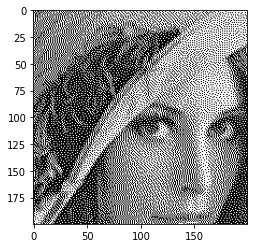

In [35]:
cm = 1/2.54  # conversion centimètres pouces.
plt.figure(figsize=(10*cm, 10*cm))
plt.imshow(bw_centre, cmap=matplotlib.cm.gray)
plt.show()

La dimension de nos écrans est généralement de 1920 x 1080 pixels.
Pour ma part, mon écran est un 24'' ou 24 pouces, soit 53,1 x 29,9 cm de largeur x hauteur.
En allant ici: https://dpi.lv/#15.6%E2%80%B3, vous pouvez trouver le nombre pixels par pouces, c'est-à-dire la résolution de votre écran en fonction de la dimension numérique (pixel) et physique. Pour ma part, il s'agit de 92 ppi ou 92/2,54 = 36,22 ppcentimètres.

Ainsi, l'image précédente a une résolution plus faible (50,8 ppi) que celle de mon écran (92 ppi). Ceci va donc impliquer que plusieurs pixels (4 environ) de mon écran vont "contenir" un seul et même pixel de l'image. Alors, `matplotlib.pyplot.imshow` est contraint **d'interpoler** ces pixels et en retranscrire un pixel **moyen** qui est souvent une moyenne des pixels voisins; ce qui fait que l'image apparaît grise !

Si l'on fait la même chose mais en faisant correspondre les 2 résolutions, alors on n'a plus besoin d'interpoler. Alors on distingue clairement chacun des pixels et notre oeil ne perçoit plus de nuance de gris ! Si vous voulez reproduire ce code avec votre propre résolution, il vous suffit de calculer la résolution de votre écran en ppi (92 pour moi), puis de calculer 92 / 2.54 pour avoir la taille _réelle_ de l'affichage qui permet de faire correspondre les 2 résolutions.

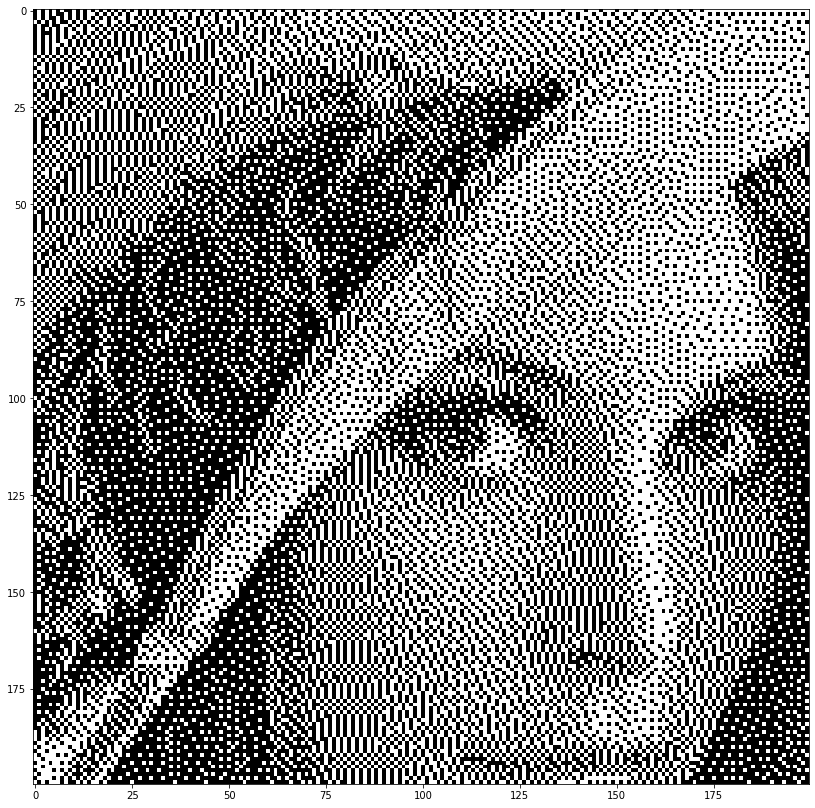

In [49]:
cm = 1/2.54  # conversion centimètres pouces.
res = 92 # la résolution de mon écran en ppi, calculable ici : https://dpi.lv/#15.6%E2%80%B3
plt.figure(figsize=(res*(cm**2), res*(cm**2)))
plt.imshow(bw_centre, cmap=matplotlib.cm.gray)
plt.show()

Vous remarquerez que dès que l'on prend une taille réelle d'affichage plus petite, les nuances de gris semblent ré-apparaître, et l'image est moins nette !

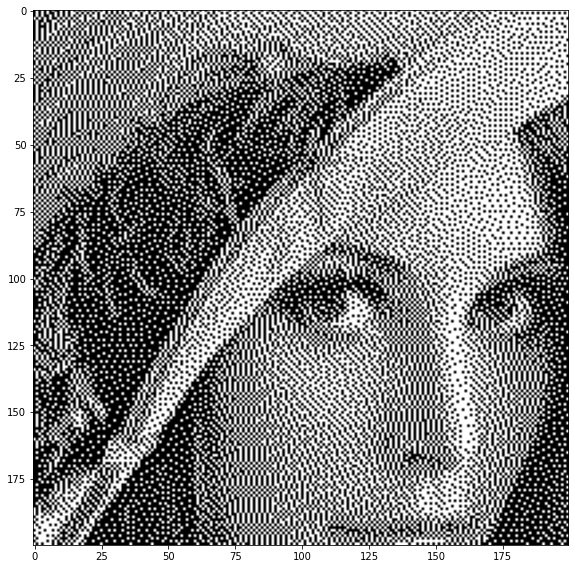

In [44]:
cm = 1/2.54  # conversion centimètres pouces.
plt.figure(figsize=(25*cm, 25*cm))
plt.imshow(bw_centre, cmap=matplotlib.cm.gray)
plt.show()